Question 1: What is Simple Linear Regression?
- Simple Linear Regression is a statistical technique used to model and analyze the relationship between one independent variable (X) and one dependent variable (Y) by fitting a straight line that best represents the data.

Question 2: What are the key assumptions of Simple Linear Regression?
- 1. Linearity

The relationship between the independent variable (X) and dependent variable (Y) must be linear.

- 2. Independence of Errors

The residuals (errors) must be independent of each other.

- 3. Homoscedasticity

The variance of errors should be constant across all values of X.

- 4. Normality of Errors

The residuals should be normally distributed.

- 5. No Significant Outliers

Extreme outliers should not heavily influence the regression line.

Question 3: What is heteroscedasticity, and why is it important to address in regression models?
- Heteroscedasticity

Heteroscedasticity occurs when the variance of the error terms (residuals) is not constant across all values of the independent variable in a regression model.

- important to address in regression model

Incorrect Standard Errors
Heteroscedasticity leads to biased standard errors of regression coefficients.

Unreliable Hypothesis Testing
Because standard errors are wrong, t-tests, p-values, and confidence intervals become unreliable, leading to false conclusions.

Loss of Efficiency
The regression estimates are no longer the Best Linear Unbiased Estimators (BLUE), reducing the efficiency of the model.

Misleading Inference
Even if coefficient estimates remain unbiased, the interpretation and statistical inference drawn from the model become invalid.

Question 4: What is Multiple Linear Regression?
- Multiple Linear Regression is a statistical technique used to model the relationship between one dependent variable and two or more independent variables by fitting a linear equation to observed data.

Question 5: What is polynomial regression, and how does it differ from linear
regression?
- Polynomial Regression

Polynomial Regression is a regression technique in which the relationship between the independent variable (X) and the dependent variable (Y) is modeled as an nth-degree polynomial, allowing the model to capture non-linear relationships in the data.

- Linear Regression

Linear Regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a straight-line equation to observed data, in order to explain or predict the dependent variable.


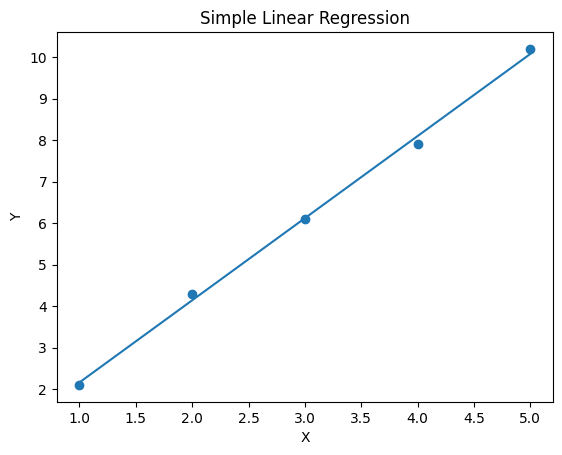

Slope: 1.98
Intercept: 0.18


In [2]:
"""Question 6: Implement a Python program to fit a Simple Linear Regression model to the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
Plot the regression line over the data points.
(Include your Python code and output in the code box below.)"""

import numpy as np
import matplotlib.pyplot as plt

# Given data
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Fit simple linear regression (y = m*x + c)
m, c = np.polyfit(X, Y, 1)

# Predicted values
Y_pred = m * X + c

# Plot data points and regression line
plt.scatter(X, Y)
plt.plot(X, Y_pred)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.show()

# Print slope and intercept
print("Slope:", m)
print("Intercept:", c)


In [3]:
""" Question 7: Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results.
(Include your Python code and output in the code box below.)"""

import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Given data
data = {
    "Area": [1200, 1500, 1800, 2000],
    "Rooms": [2, 3, 3, 4],
    "Price": [250000, 300000, 320000, 370000]
}

df = pd.DataFrame(data)

# Independent and dependent variables
X = df[["Area", "Rooms"]]
Y = df["Price"]

# Add constant
X_const = sm.add_constant(X)

# Fit Multiple Linear Regression model
model = sm.OLS(Y, X_const).fit()

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_const.values, i)
    for i in range(X_const.shape[1])
]

print(model.summary())
print(vif_data)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Sun, 14 Dec 2025   Prob (F-statistic):             0.0377
Time:                        03:27:53   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.032e+05   9488.293     10.872      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


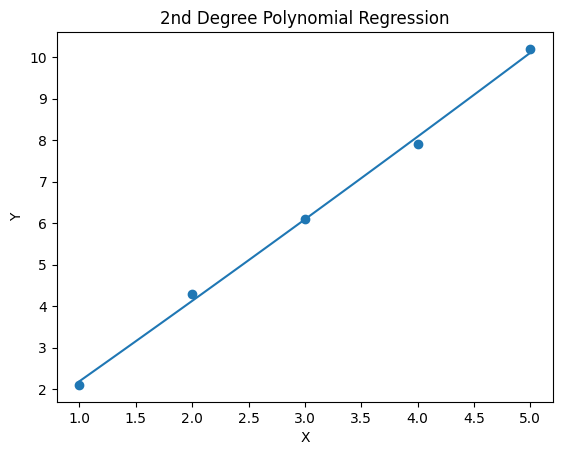

Polynomial coefficients: [0.01428571 1.89428571 0.28      ]


In [4]:
"""Question 8: Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]
Fit a 2nd-degree polynomial and plot the resulting curve.
(Include your Python code and output in the code box below.)"""
import numpy as np
import matplotlib.pyplot as plt

# Given data
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Fit 2nd-degree polynomial regression
coefficients = np.polyfit(X, Y, 2)
poly_model = np.poly1d(coefficients)

# Generate smooth curve
X_curve = np.linspace(1, 5, 100)
Y_curve = poly_model(X_curve)

# Plot data points and polynomial curve
plt.scatter(X, Y)
plt.plot(X_curve, Y_curve)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2nd Degree Polynomial Regression")
plt.show()

# Print polynomial equation coefficients
print("Polynomial coefficients:", coefficients)


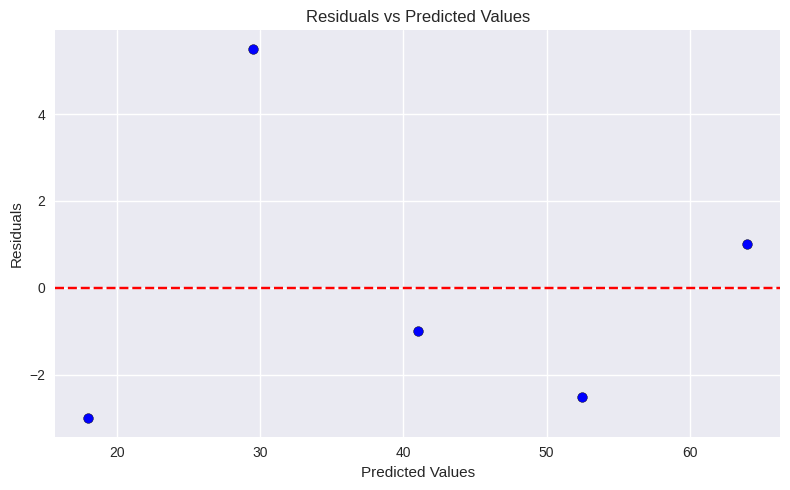

In [6]:
'''Question 9: Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals.
(Include your Python code and output in the code box below.)'''

# Creating residuals plot for linear regression and assessing heteroscedasticity
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Step 1: Define data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Step 2: Fit linear regression model
model = LinearRegression()
model.fit(X, Y)

# Step 3: Predict and calculate residuals
Y_pred = model.predict(X)
residuals = Y - Y_pred

# Step 4: Plot residuals vs predicted values
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(8, 5))
plt.scatter(Y_pred, residuals, color='blue', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()

Question 10: Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location.However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.
- When predicting house prices using regression, the presence of heteroscedasticity and multicollinearity can reduce the reliability of the model. To ensure a robust model, the following steps are taken:

Heteroscedasticity

Heteroscedasticity means the variance of errors is not constant.

Steps:

Detect it using residual plots or the Breusch–Pagan test.

Apply log transformation to the dependent variable (house price).

Transform skewed independent variables such as area.

Use heteroscedasticity-robust standard errors.

Apply weighted least squares or machine learning models if needed.

Multicollinearity

Multicollinearity occurs when independent variables are highly correlated.

Steps:

Detect it using correlation matrix or Variance Inflation Factor (VIF).

Remove or combine highly correlated variables.

Standardize variables to improve model stability.

Apply regularization techniques such as Ridge or Lasso regression.

Use Principal Component Analysis (PCA) if many correlated variables exist.

Final Validation

Validate the model using cross-validation.

Evaluate performance using RMSE or MAE.

Recheck residual plots to confirm improvements.
